In [1]:
import pandas as pd
from csv import reader
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
from math import sqrt
import time
from IPython.display import clear_output

In [2]:
data = pd.read_csv("cricketers.csv", delimiter='\t')

In [3]:
data.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [4]:
data.columns

Index(['PLAYER', 'matches_played', 'innings_batted', 'runs_scored',
       'highest_runs', 'balls_faced', 'average_runs', 'strike_rate',
       'innings_bowled', 'overs', 'runs_given', 'wickets_obtained',
       'average_runs_per_wicket ', 'bowling_economy '],
      dtype='object')

In [5]:
data = data.rename(columns = {'bowling_economy ' : 'bowling_economy'})

In [6]:
data.dtypes

PLAYER                       object
matches_played                int64
innings_batted                int64
runs_scored                   int64
highest_runs                  int64
balls_faced                   int64
average_runs                float64
strike_rate                 float64
innings_bowled                int64
overs                       float64
runs_given                    int64
wickets_obtained              int64
average_runs_per_wicket     float64
bowling_economy             float64
dtype: object

In [7]:
data.shape

(109, 14)

In [8]:
duplicate_data = data[data.duplicated()]
print(duplicate_data)

Empty DataFrame
Columns: [PLAYER, matches_played, innings_batted, runs_scored, highest_runs, balls_faced, average_runs, strike_rate, innings_bowled, overs, runs_given, wickets_obtained, average_runs_per_wicket , bowling_economy]
Index: []


In [9]:
print(data.isnull().sum())

PLAYER                      0
matches_played              0
innings_batted              0
runs_scored                 0
highest_runs                0
balls_faced                 0
average_runs                0
strike_rate                 0
innings_bowled              0
overs                       0
runs_given                  0
wickets_obtained            0
average_runs_per_wicket     0
bowling_economy             0
dtype: int64


In [10]:
index_list = data[data['matches_played'] == 0].index.values
print(index_list)
for index in index_list:
#     print(data.loc[index, 'innings_batted'])
    if data.loc[index, 'innings_batted'] >= data.loc[index, 'innings_bowled']:
        data.loc[index, 'matches_played'] = data.loc[index, 'innings_batted']
    else:
        data.loc[index, 'matches_played'] = data.loc[index, 'innings_bowled']
index_list = data[data['matches_played'] == 0].index.values
print(index_list)

[100 101 102 103 104 105 106 107 108]
[]


In [11]:
data.loc[[108]]

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
108,Ben Laughlin,7,0,0,0,0,0.0,0.0,7,21.0,212,9,22.44,10.04


In [12]:
index_list = data[(data['strike_rate'] == 0.0) & (data['innings_batted'] != 0)].index.values
print(index_list)
index_list = data[(data['bowling_economy'] == 0.0) & (data['innings_bowled'] != 0)].index.values
print(index_list)

[]
[]


In [13]:
data.drop(['PLAYER'], 1, inplace=True)

In [14]:
data.shape

(109, 13)

In [15]:
normaliser = preprocessing.MinMaxScaler(feature_range=(0,1))
data[['average_runs', 'bowling_economy']] = normaliser.fit_transform(data[['average_runs', 'bowling_economy']])


In [16]:
for row in data:
    print(row)

matches_played
innings_batted
runs_scored
highest_runs
balls_faced
average_runs
strike_rate
innings_bowled
overs
runs_given
wickets_obtained
average_runs_per_wicket 
bowling_economy


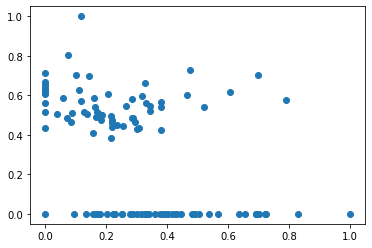

In [17]:
plt.scatter(data['average_runs'], data['bowling_economy'])

In [18]:
centroids_position = [(random.random(),random.random()),(random.random(),random.random()),(random.random(),random.random()),(random.random(),random.random()),(random.random(),random.random())]
centroids_label = ['A', 'B', 'C', 'D', 'E']
colors = ("red", "green", "blue", "orange", "cyan")
print(centroids_position)

[(0.6575089036547916, 0.9344204427394276), (0.9177865825017857, 0.9901543125587883), (0.5959365256671536, 0.3537260562928467), (0.07706133407904725, 0.5489465785612366), (0.9544122974986851, 0.6962817596553355)]


In [19]:
data['cluster'] = ""

In [20]:
def euclidean_calculation(pos1, pos2):
    return sqrt( ((pos1[0] - pos2[0]) ** 2) + ((pos1[1] - pos2[1]) ** 2) )

In [21]:
def draw_graph():
    plt.figure(figsize=(5,5))
    for index in range(k):
        plt.scatter(x=data.loc[data['cluster']==centroids_label[index], 'average_runs'], 
                    y=data.loc[data['cluster']==centroids_label[index],'bowling_economy'], 
                    color=colors[index], 
                    alpha=0.7)


        plt.annotate(centroids_label[index], 
                     centroids_position[index],
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=20, weight='bold',
                     color=colors[index]) 
    plt.show()

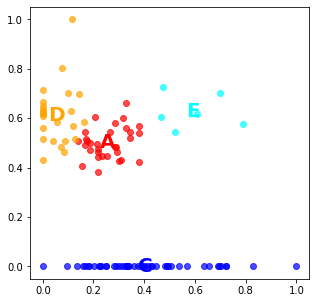

In [ ]:
continue_flag = True
max_iter = 20
counter = 1
k = 5
while continue_flag:
    for index in range(len(data)):
        distance_list = []
        for centroid_index in range(k):
            distance_list.append(euclidean_calculation( (data.loc[index, 'average_runs'],data.loc[index, 'bowling_economy']), centroids_position[centroid_index]))
        min_index = distance_list.index(min(distance_list))
        data.loc[index, 'cluster'] = centroids_label[min_index]
   
    clear_output(wait=True)
    draw_graph()
    time.sleep(3)

    prev_centroids_pos = list(centroids_position)
    for centroid_index in range(k):
        centroids_position[centroid_index] = (data[data['cluster'] ==  centroids_label[centroid_index]]["average_runs"].mean() , data[data['cluster'] ==  centroids_label[centroid_index]]["bowling_economy"].mean())

    for centroid_index in range(k):
#         print((centroids_position[centroid_index][0] - prev_centroids_pos[centroid_index][0]), (centroids_position[centroid_index][1] - prev_centroids_pos[centroid_index][1]))
        if ((centroids_position[centroid_index][0] - prev_centroids_pos[centroid_index][0]) != 0.0 or ((centroids_position[centroid_index][1] - prev_centroids_pos[centroid_index][1]) != 0.0)):
            continue_flag = True
        else:
            continue_flag = False
        if continue_flag:
            break
    if counter > max_iter:
        break
    counter+=1
        
    